In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
url = 'https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/7_logistic_reg/insurance_data.csv'
df= pd.read_csv(url)
df.head(4)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0


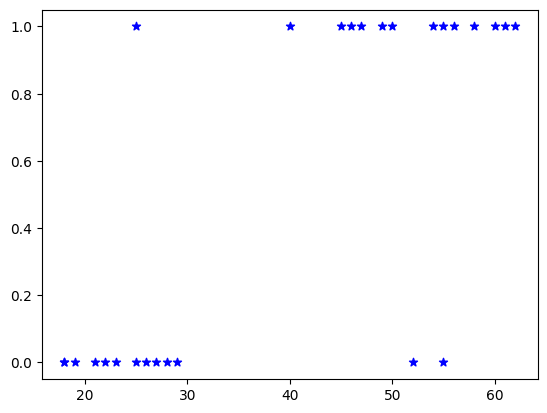

In [7]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='blue')

In [12]:
pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/11.0 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.0 MB 1.4 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.0 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.0 MB 1.7 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.7 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.0 MB 1.7 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.0 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.0 MB 1.7 MB/s eta 0:00:05
   -------------- -----------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [21]:
X_test

,age
3,52
21,26
17,58


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
model.predict(X_test)

array([1, 0, 1])

In [29]:
model.score(X_test,y_test)

0.6666666666666666

In [30]:
model.predict_proba(X_test)

array([[0.07756798, 0.92243202],
       [0.83583826, 0.16416174],
       [0.03159024, 0.96840976]])

In [34]:
model.predict([[23]])

c:\Users\sai kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

#Exercise

In [35]:
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline

In [36]:
url = 'https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv'
df = pd.read_csv(url)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Data Exploration and Visualization

In [37]:
left = df[df.left==1]
left.shape

(3571, 10)

In [38]:
retrained=df[df.left==0]
retrained.shape

(11428, 10)

In [ ]:
#Average no of col


TypeError: agg function failed [how->mean,dtype->object]

In [41]:

import pandas as pd
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include='number')
mean_values = df_numeric.groupby(df['left']).mean()


In [42]:

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts where possible, sets non-convertible values to NaN
mean_values = df.groupby('left').mean()


In [43]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,NaN,NaN
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,NaN,NaN


In [45]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

TypeError: no numeric data to plot

In [46]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

TypeError: no numeric data to plot

In [47]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,NaN
1,0.80,262,0,NaN
2,0.11,272,0,NaN
3,0.72,223,0,NaN
4,0.37,159,0,NaN


In [48]:
salary_dummies=pd.get_dummies(subdf.salary,prefix="salary")

In [52]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [53]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,NaN
1,0.80,262,0,NaN
2,0.11,272,0,NaN
3,0.72,223,0,NaN
4,0.37,159,0,NaN


In [54]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0


In [55]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0


In [57]:
y=df.left

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [61]:
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0])

In [63]:
model.score(X_test,y_test)

0.7675238095238095